In [24]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from HopfieldNetwork import *
import random 
import matplotlib.animation as animation

plt.rcParams['font.family'] = "Arial"
%load_ext autoreload
%autoreload 2

#### From Article "Hopfield Networks: Neural Memory Machines by Ethan Crouse" to fetch MNIST data#### 

#for MNIST fetch
import requests, gzip, os, hashlib

#Fetch MNIST dataset from the ~SOURCE~
def fetch_MNIST(url):
  """fetches MNIST"""
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  
  return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
        
        








The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
   ########### From here on my code#########
   
   
def MNIST_Hopfield(number_of_targetmemories): #test out the Hopfield_Network object on some MNIST data 
  n = number_of_targetmemories 
  #fetch MNIST dataset for some random memory downloads
  X = fetch_MNIST(
      "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
      )[0x10:].reshape((-1,784)) #-1 tells python to figure out how many rows it needs
  

  X_binary = np.where(X>50, 1,-1) #when X>50 place 1, else -1
   
  memory_index = np.random.randint(1,len(X_binary),n) #Choosing n random integers between 0 and #of images
  unmoved_target_memories = np.empty([n,784])

  for i in range(n):
      unmoved_target_memories[i,:784] = np.array([X_binary[memory_index[i],:]])
  
  
  if n >= 3:
      unmoved_target_memories= np.array([X_binary[memory_index[0],:],X_binary[memory_index[1],:], X_binary[memory_index[2],:]])  #Grabbing two random images as our target memory
      reshape0 = unmoved_target_memories[0,:]
      reshape0= reshape0.reshape(28,28)

      move0 = reshape0[:,:5] #take all the rows and the first 4 columns
      move0 = np.concatenate((reshape0[:,5:],move0), axis =1)
      tm0 = move0.reshape(1,784)
      tm1 = unmoved_target_memories[1,:].reshape(1,784)

      reshape2 = unmoved_target_memories[2,:]
      reshape2 = reshape2.reshape(28,28)
      move2 = reshape2[:,23:]
      move2 = np.concatenate((move2,reshape2[:,0:23]),axis = 1)
        # move2 = np.rot90(move2,1)
      tm2 = move2.reshape(1,784)
 
      targetmemories = np.concatenate((tm0,tm1,tm2)) #shifted target memories
  else:
      targetmemories = unmoved_target_memories


  return targetmemories, unmoved_target_memories, n


tm,utm, n= MNIST_Hopfield(2) #returns target memories

In [73]:
scramble = 30 #percent scramble
initial = np.random.randint(-1,2,tm.shape[1]) #initializing random states (-1,0,1) for each neuron
initial[initial == 0] = -1 #replacing 0s with -1 for neuron states
initial_test = np.copy(utm[1,:])
def Run_BHN(number_of_neurons):
    H1=HopfieldNetwork(tm,utm,initial_test,scramble)
    cells, energy, singlestate,E2, unshifted_cells = H1.neuron_activation(number_of_neurons)
    return cells, energy, singlestate, E2, unshifted_cells

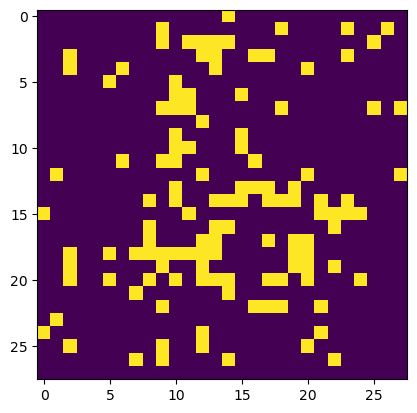

In [141]:
# plot initial random scrambled image
# Cells, _,_,_,_= Run_BHN(0)
# plt.figure(1)
# plt.imshow(Cells.reshape(28,28))
# plot memories

# plt.figure(2)
# plt.imshow(tm[0,:].reshape(28,28))
# plt.figure(3)
# plt.imshow(tm[1,:].reshape(28,28))
# plt.figure(4)
# plt.imshow(tm[2,:].reshape(28,28))
# # plot converged memory
# Cells, E,_, unshifted_cells = Run_BHN(784)
# plt.figure(5)
# plt.imshow(Cells.reshape(28,28))
# plt.figure(6)
# plt.plot(E)


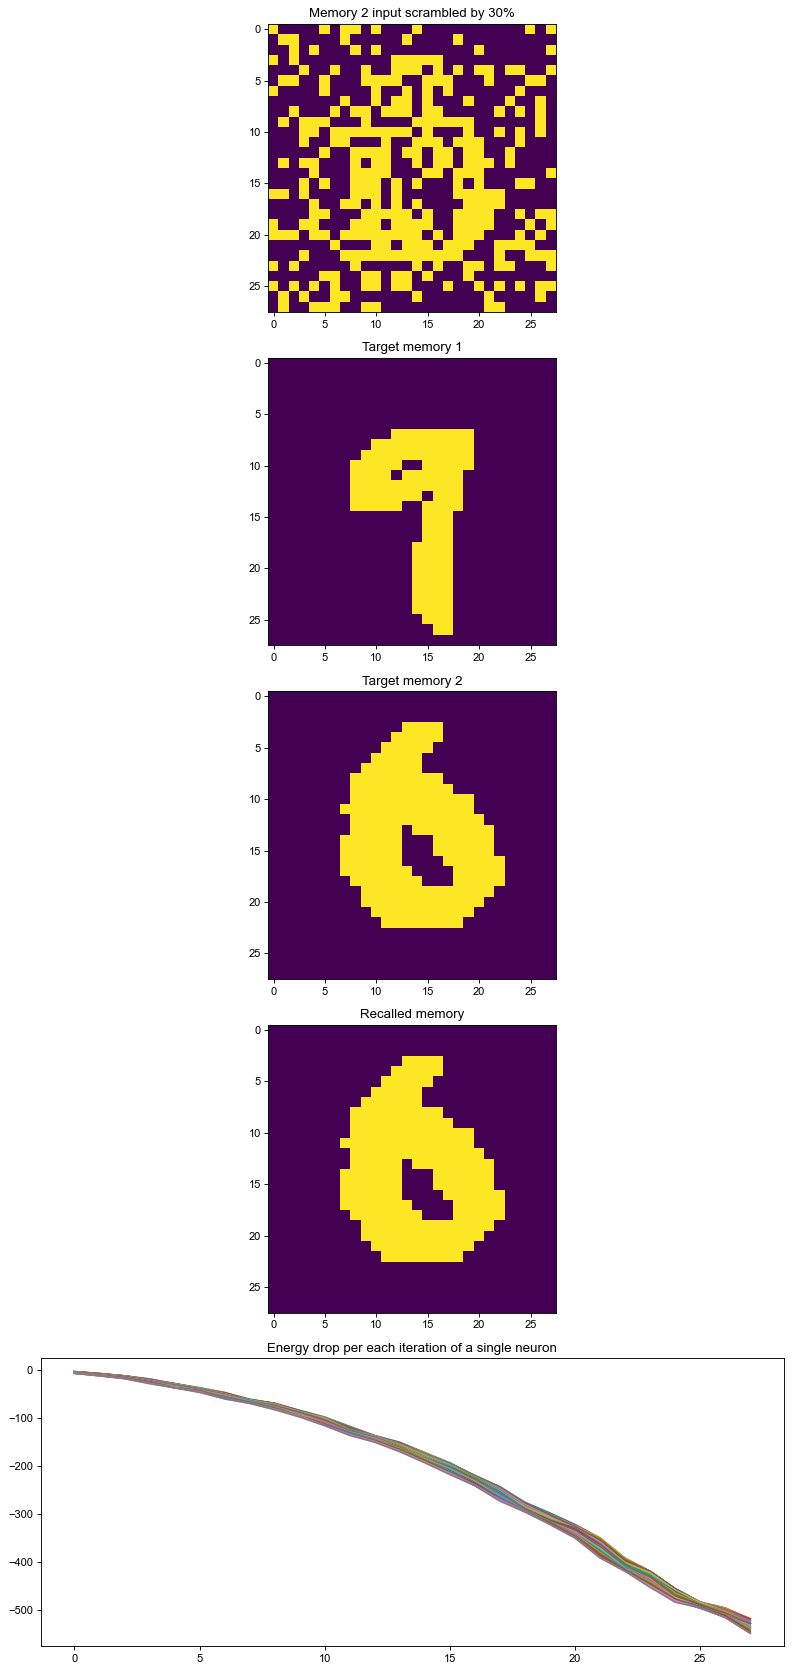

In [77]:

if n>=3:
    fig, ax = plt.subplots(6, 2, dpi=80, figsize=(10, 21)) #makes plots bigger by 7cm horizontal(3.5 x columns(2)) and 21cm vertical(3.5 x rows(6) = 21)
    # plot initial scrambled image of target memory 2
    Cells, _,_,_,_= Run_BHN(0)
    ax[0,0].set_title(f"Memory 2 input scrambled by {scramble}%" )
    ax[0,0].imshow(Cells.reshape(28,28))
    ax[0,1].set_title(f"Memory 2 input scrambled input by {scramble}%" )
    ax[0,1].imshow(Cells.reshape(28,28))
    #Target images
    Cells, E1,_,E2,unshifted_cells = Run_BHN(784)
    ax[1,0].set_title("Target memory 1 shifted to the left" )
    ax[1,0].imshow(tm[0,:].reshape(28,28))
    ax[2,0].set_title("Target memory 2" )
    ax[2,0].imshow(tm[1,:].reshape(28,28))
    ax[3,0].set_title("Target memory 3 shifted to the right" )
    ax[3,0].imshow(tm[2,:].reshape(28,28))
    ax[4,0].set_title("Recalled memory" )
    ax[4,0].imshow(Cells.reshape(28,28))
    ax[5,0].set_title("Energy drop per each iteration of a single neuron" )
    ax[5,0].plot(E1.reshape(28,28))
    ax[1,1].set_title("Target memory 1" )
    ax[1,1].imshow(utm[0,:].reshape(28,28))
    ax[2,1].set_title("Target memory 2" )
    ax[2,1].imshow(utm[1,:].reshape(28,28))
    ax[3,1].set_title("Target memory 3" )
    ax[3,1].imshow(utm[2,:].reshape(28,28))
    ax[4,1].set_title("Recalled memory" )
    ax[4,1].imshow(unshifted_cells.reshape(28,28))
    ax[5,1].set_title("Energy drop per each iteration of a single neuron" )
    ax[5,1].plot(E2.reshape(28,28))
    fig.tight_layout()
else:
    fig, ax = plt.subplots(5, 1, dpi=80, figsize=(10, 21)) #makes plots bigger by 7cm horizontal(3.5 x columns(2)) and 21cm vertical(3.5 x rows(6) = 21)
    # plot initial scrambled image of target memory 2
    Cells, _,_,_,_= Run_BHN(0)
    ax[0].set_title(f"Memory 2 input scrambled by {scramble}%" )
    ax[0].imshow(Cells.reshape(28,28))
    #Target images
    Cells, E1,_,E2,unshifted_cells = Run_BHN(784)
    ax[1].set_title("Target memory 1" )
    ax[1].imshow(utm[0,:].reshape(28,28))
    ax[2].set_title("Target memory 2" )
    ax[2].imshow(utm[1,:].reshape(28,28))
    ax[3].set_title("Recalled memory" )
    ax[3].imshow(unshifted_cells.reshape(28,28))
    ax[4].set_title("Energy drop per each iteration of a single neuron" )
    ax[4].plot(E2.reshape(28,28))
    fig.tight_layout()
plt.savefig("2-input_30%")


In [221]:
initial = np.random.randint(-1,2,tm.shape[1]) #initializing random states (-1,0,1) for each neuron
initial[initial == 0] = -1 #replacing 0s with -1 for neuron states
initial[6]
inti = random.sample(range(5),0)
for i in range(2):
    print(i)



0
1


Presentation Outline:

Breif Overview of Hopfield Networks
Talk about how our network was constructed
Show Correlation matrix

Show 2 image MNIST :
    One scenario with 20% scrambling 
    One scenario with random state (50% scrambling)

Show the Energy plot and explain why this is happening

Show 3 images with MNIST with and without moving target memories
    with 20% scrambling
    

Show 3 self made images
    20% scrambling
    50% scrambling

